In [6]:
import sys
sys.path.append("../../")

import torch
import torchvision.utils
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader
from torchvision import models
from torchsummary import summary

import numpy as np
import cv2

import src.neuralNetworksArch.BasicSiamese as bSiamese
import src.utils.Visual as vis
import src.utils.DatasetLoader as dsetLoader
import src.utils.LossFunction as lossFunc

from src.config.Param import *

In [7]:
MODEL_PATH = '../../models/full-contrastive-basicSiamese-100epoch-cuhk02.pth'
DATATEST_PATH = '../../dataset/cuhk02/datatest.csv'
IMAGES_PATH = '../../dataset/cuhk02/images/full/'

In [8]:
trans = transforms.Compose([transforms.ToTensor()])
test_dataset = dsetLoader.ContrastiveDataset(csv_path=DATATEST_PATH, images_path=IMAGES_PATH, transform=trans)

test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [9]:
model  = bSiamese.BasicSiameseNetwork()
model.load_state_dict(torch.load(MODEL_PATH, map_location=Param.device))
model.eval()

BasicSiameseNetwork(
  (cnn1): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReflectionPad2d((1, 1, 1, 1))
    (5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU(inplace=True)
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): ReflectionPad2d((1, 1, 1, 1))
    (10): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU(inplace=True)
    (12): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(30, 80))
  (fc1): Sequential(
    (0): Linear(in_features=38400, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1000, out_features=500, bias=T

### Parameter Summary

In [11]:
summary(model, [(3, 60, 160), (3, 60, 160)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ReflectionPad2d-1           [-1, 3, 62, 162]               0
            Conv2d-2           [-1, 8, 60, 160]             224
              ReLU-3           [-1, 8, 60, 160]               0
       BatchNorm2d-4           [-1, 8, 60, 160]              16
   ReflectionPad2d-5           [-1, 8, 62, 162]               0
            Conv2d-6          [-1, 16, 60, 160]           1,168
              ReLU-7          [-1, 16, 60, 160]               0
       BatchNorm2d-8          [-1, 16, 60, 160]              32
         MaxPool2d-9           [-1, 16, 30, 80]               0
  ReflectionPad2d-10           [-1, 16, 32, 82]               0
           Conv2d-11           [-1, 16, 30, 80]           2,320
             ReLU-12           [-1, 16, 30, 80]               0
      BatchNorm2d-13           [-1, 16, 30, 80]              32
AdaptiveAvgPool2d-14           [-1, 16,

In [13]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

cnn1.1.weight tensor([[[[-2.0038e-01,  1.8267e-01,  3.6241e-01],
          [ 1.5170e-01, -1.7451e-01,  9.3005e-02],
          [ 3.5432e-01,  2.4779e-01,  6.8847e-02]],

         [[-1.4518e-01,  1.6149e-01,  5.1105e-02],
          [-7.1763e-02, -1.4844e-01,  1.2715e-02],
          [ 5.7061e-02,  1.1355e-01, -2.4932e-01]],

         [[-2.5155e-01,  1.3134e-01,  1.0203e-01],
          [-2.2778e-01,  9.5047e-02, -1.9158e-01],
          [-2.3561e-03,  1.0812e-02, -2.0878e-01]]],


        [[[ 5.6453e-03,  1.3632e-01, -2.1042e-01],
          [-6.6571e-02,  2.7474e-01,  2.9998e-01],
          [ 3.5596e-01, -2.0105e-01, -1.6205e-01]],

         [[ 1.1135e-01,  1.7931e-01, -4.5376e-01],
          [ 2.7398e-03,  2.0388e-01, -5.5359e-02],
          [ 1.3457e-01,  2.0992e-01, -2.3991e-01]],

         [[-3.8297e-01,  3.4732e-01,  3.3511e-02],
          [-3.9586e-02, -2.4306e-01,  1.4487e-01],
          [ 7.0636e-02,  1.7393e-01, -6.9113e-03]]],


        [[[-3.0154e-02, -1.7788e-01, -7.5622e-02],
 

          [ 0.1505,  0.1216, -0.1157]]]])
cnn1.5.bias tensor([-0.1515,  0.1542, -0.2646, -0.4832, -0.0481, -0.4437, -0.1595, -0.1260,
        -0.0438, -0.1146,  0.0766, -0.0666, -0.2254, -0.1711, -0.1401, -0.2099])
cnn1.7.weight tensor([1.3356, 0.7766, 1.0877, 1.0196, 0.7615, 0.9892, 0.9311, 0.9307, 1.1908,
        0.8041, 0.8365, 0.9363, 0.9257, 1.0143, 0.9176, 0.9785])
cnn1.7.bias tensor([ 0.2117, -0.2348,  0.0024, -0.3065, -0.1831,  0.6195,  0.3983,  0.2664,
         0.1310, -0.0861,  0.1849, -0.0851, -0.3863,  0.2515,  0.0302, -0.1830])
cnn1.10.weight tensor([[[[-0.0574,  0.0624, -0.1068],
          [-0.0391, -0.4078,  0.3406],
          [-0.3864,  0.0790,  0.0770]],

         [[-0.0419,  0.1389,  0.1962],
          [-0.0414,  0.1029,  0.0167],
          [ 0.0437,  0.0359, -0.0949]],

         [[ 0.1624, -0.0114, -0.0099],
          [ 0.1732, -0.0166, -0.1595],
          [-0.0583, -0.1301, -0.1561]],

         ...,

         [[-0.0533,  0.5889,  0.0628],
          [ 0.0459, -0.0481

         1.3143e-01, -1.7345e-02, -1.5386e-01, -1.1120e-01,  1.7787e-02])
fc1.2.weight tensor([[-0.0015, -0.0147, -0.0141,  ...,  0.0072, -0.0210, -0.0030],
        [ 0.0172, -0.0147,  0.0057,  ..., -0.0011, -0.0066, -0.0117],
        [ 0.0042, -0.0253, -0.0153,  ..., -0.0056, -0.0088, -0.0067],
        ...,
        [-0.0721, -0.0318, -0.0091,  ...,  0.0214,  0.0372, -0.0216],
        [-0.0031, -0.0008, -0.0088,  ..., -0.0062, -0.0056, -0.0053],
        [-0.0088, -0.0279, -0.0144,  ..., -0.0488, -0.0118,  0.0213]])
fc1.2.bias tensor([ 6.0969e-03, -2.5304e-03, -5.3290e-03, -5.0635e-02, -1.1689e-02,
        -1.7568e-02,  2.6066e-02, -1.0612e-01, -1.1785e-02, -1.2694e-02,
         2.3779e-03,  1.4371e-02,  3.7321e-01, -4.6129e-03, -4.5612e-03,
         9.0837e-02, -4.1770e-03, -3.6446e-02, -3.9894e-02, -5.5063e-02,
        -1.5502e-02,  2.8289e-03,  1.8483e-02, -3.1578e-03,  1.4577e-02,
         3.8626e-02,  5.5260e-02,  8.9299e-01, -5.2930e-03, -4.7724e-04,
         3.4904e-01, -5.7242e-

        [ 0.0030,  0.0041,  0.0095,  ..., -0.0073,  0.0020,  0.0276]])
fc1.4.bias tensor([-3.7876e-02, -7.4262e-03,  1.5471e-02, -2.2495e-02, -1.8874e-03,
        -1.1782e-03, -6.0408e-03, -9.3920e-03,  9.5962e-01, -1.0701e-02,
        -4.1617e-02, -1.4942e-02,  1.5659e+00, -1.4460e-02, -1.2810e-02,
        -5.0658e-03,  1.3808e-02, -5.3209e-02, -1.9011e-02,  4.9313e-03,
         2.1868e-02,  4.6649e-03, -4.5086e-03, -1.3366e-02,  1.4435e+00,
         2.0473e-02, -1.4899e-02, -3.0899e-02, -1.2444e-02, -9.4064e-03,
         4.0551e-02,  1.1594e+00, -2.6824e-02, -3.1448e-02,  4.0905e-03,
        -1.0985e-02,  3.0801e-02, -1.5053e-02, -4.3459e-02, -2.5115e-02,
         4.3220e-03,  8.3385e-03, -2.2367e-02,  1.3579e-01,  1.1342e+00,
         1.1993e-02, -3.4273e-02, -5.1770e-03,  5.3497e-03,  3.0217e-02,
         7.2863e-05, -3.0723e-03,  1.3092e-02, -2.8959e-02,  8.8800e-01,
        -8.9000e-04, -3.9458e-02, -3.5437e-02, -8.3664e-04,  6.0094e-03,
        -8.6119e-03,  1.1735e-03, -5.9343e

### Pengujian menggunakan citra dengan resolusi yang sama dengan resolusi dataset
Threshold yang digunakan adalah 0.5. Jika nilai dissimilarity <= 0.5 maka citra memuat objek yang sama begitupun sebaliknya.

Dissimilarity 0.010078059223781466


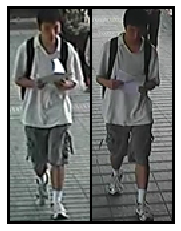

Dissimilarity 0.03721067622027319


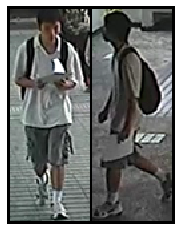

Dissimilarity 0.029960718200708447


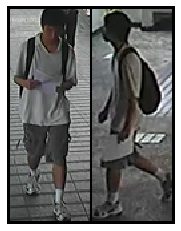

Dissimilarity 0.544192516344415


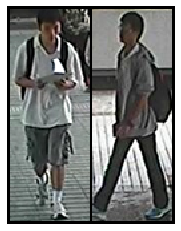

Dissimilarity 0.623142038019463


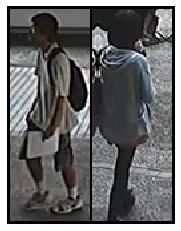

Dissimilarity 0.6528013461126398


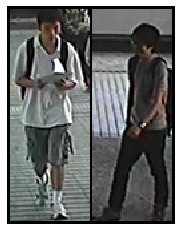

Dissimilarity 0.592361382665564


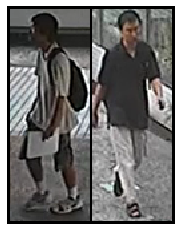

In [67]:
dataiter = iter(test_dataloader)
with torch.no_grad():
    for i in range(len(test_dataloader)):
        img1, img2, label = next(dataiter)
        concatenated = torch.cat((img1, img2),0)

        img1 = img1.to(Param.device)
        img2 = img2.to(Param.device)
        label = label.to(Param.device)
        
        out1, out2 = model(img1, img2)
        euclidean_distance = F.pairwise_distance(out1, out2)
        d = float(euclidean_distance.item())
        d = abs((1 / (1 + d)) - 1)
        
        if(i % 2 == 0):
            print('Dissimilarity', d)
            vis.imshow(torchvision.utils.make_grid(concatenated))

### Test dengan pasangan gambar yang di-resize dan padding agar tidak terjadi distorsi pada objek

In [62]:
img1 = cv2.imread('../../dataset/testing/img1.png')
img2 = cv2.imread('../../dataset/testing/img2.png')

# img1 = cv2.resize(img1, (60,160))
# img2 = cv2.resize(img2, (60,160))

single_pair_datset = dsetLoader.SinglePairDataset(img1=img1, img2=img2, width=60, height=160, transform=trans)
single_pair_dataloader = DataLoader(single_pair_datset, batch_size=1, shuffle=False)

Dissimilarity 0.6113193865426081


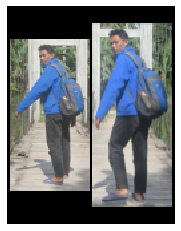

In [63]:
single_pair_dataiter = iter(single_pair_dataloader)
with torch.no_grad():
    img1, img2 = next(single_pair_dataiter)
    concatenated = torch.cat((img1, img2),0)

    img1 = img1.to(Param.device)
    img2 = img2.to(Param.device)

    out1, out2 = model(img1, img2)
    euclidean_distance = F.pairwise_distance(out1, out2)
    d = float(euclidean_distance.item())
    d = abs((1 / (1 + d)) - 1)

    print('Dissimilarity', d)
    vis.imshow(torchvision.utils.make_grid(concatenated))

### Test dengan pasangan gambar yang hanya di-resize sehingga terjadi distorsi pada objek

In [64]:
img1 = cv2.imread('../../dataset/testing/img1.png')
img2 = cv2.imread('../../dataset/testing/img2.png')

img1 = cv2.resize(img1, (60,160))
img2 = cv2.resize(img2, (60,160))

single_pair_datset = dsetLoader.SinglePairDataset(img1=img1, img2=img2, width=60, height=160, transform=trans)
single_pair_dataloader = DataLoader(single_pair_datset, batch_size=1, shuffle=False)

Dissimilarity 0.11432546652484898


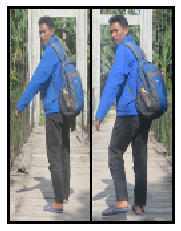

In [65]:
single_pair_dataiter = iter(single_pair_dataloader)
with torch.no_grad():
    img1, img2 = next(single_pair_dataiter)
    concatenated = torch.cat((img1, img2),0)

    img1 = img1.to(Param.device)
    img2 = img2.to(Param.device)

    out1, out2 = model(img1, img2)
    euclidean_distance = F.pairwise_distance(out1, out2)
    d = float(euclidean_distance.item())
    d = abs((1 / (1 + d)) - 1)

    print('Dissimilarity', d)
    vis.imshow(torchvision.utils.make_grid(concatenated))

### Kesimpulan :
Citra dengan distorsi justru memberikan hasil yang lebih baik karena tidak terdapat blank spot pada citra.